<a href="https://colab.research.google.com/github/rramos962012/Rob/blob/master/Apple_Stock_Prediction_using_Artificial_Neural_Network_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses an artificial neural network call Long Short Term Memory (LSTM)
#             To predict the closing price of a company (Apple) using the past 60 day stock price. 

In [ ]:
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = ' 2012-01-01', end = '2020-08-06')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-07-31,425.660004,403.299988,411.540009,425.040009,93584200.0,425.040009
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,435.750000
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,438.660004


In [ ]:
#Get the number of rows and colums in the data set
df.shape

(2163, 6)

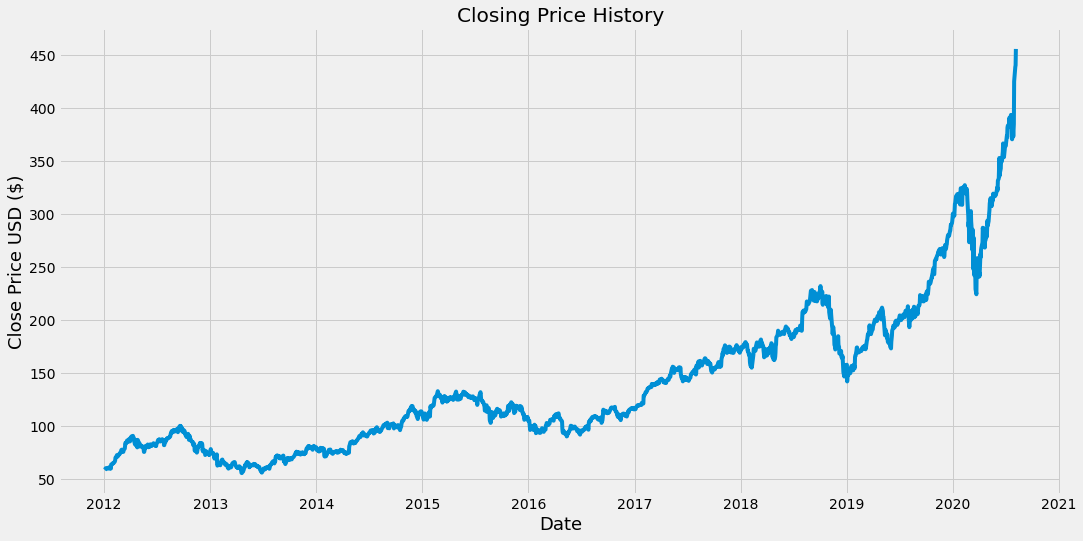

In [ ]:
#Visualize the closing price history
plt.figure(figsize =( 16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close colum'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset)* .8)

training_data_len

1731

In [ ]:
#Scale the data; good practice to scale the data before feeding it to a neural network
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00739618],
       [0.00818583],
       [0.00982585],
       ...,
       [0.95760597],
       [0.96158275],
       [1.        ]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
      print(x_train)
      print(y_train)
      print()
      

[array([0.00739618, 0.00818583, 0.00982585, 0.01138727, 0.01114787,
       0.0116874 , 0.01144086, 0.01102639, 0.01046185, 0.01220906,
       0.01378478, 0.01329884, 0.01063693, 0.01317736, 0.01067623,
       0.02005545, 0.01933012, 0.02027698, 0.02232433, 0.02356417,
       0.02346055, 0.02307824, 0.02470755, 0.02624037, 0.02797688,
       0.03078171, 0.03667365, 0.03676297, 0.04004303, 0.04249412,
       0.0382815 , 0.03990367, 0.03987152, 0.04442   , 0.04377327,
       0.04497023, 0.0471212 , 0.04831818, 0.05176616, 0.05427801,
       0.05500332, 0.05525701, 0.05096223, 0.04992603, 0.05007968,
       0.0541172 , 0.05525344, 0.05769381, 0.06344641, 0.07112129,
       0.06968493, 0.0696885 , 0.07523743, 0.07697392, 0.07573765,
       0.07460858, 0.07343305, 0.07733837, 0.08001816, 0.08114009])]
[0.078367406443692]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#Reshape the data, because at the moment our data is two dimensional and the LSTM model needs the data to be 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1671, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1671/1671 [==============================] - 30s 18ms/step - loss: 3.5671e-04
Epoch 2/3
1671/1671 [==============================] - 31s 18ms/step - loss: 1.7888e-04
Epoch 3/3
1671/1671 [==============================] - 31s 18ms/step - loss: 1.1421e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]


for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE) the standard deviation of the residuals, so to get an idea of how your model performed. 
rmse = np.sqrt(np.mean( predictions - y_test )**2)
rmse

4.014416553356029

In [ ]:
#To get an rmse of 0 means that the prediction was exact and absolutely correct, but in this case it wasn't but an error of ~5 is decent. 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


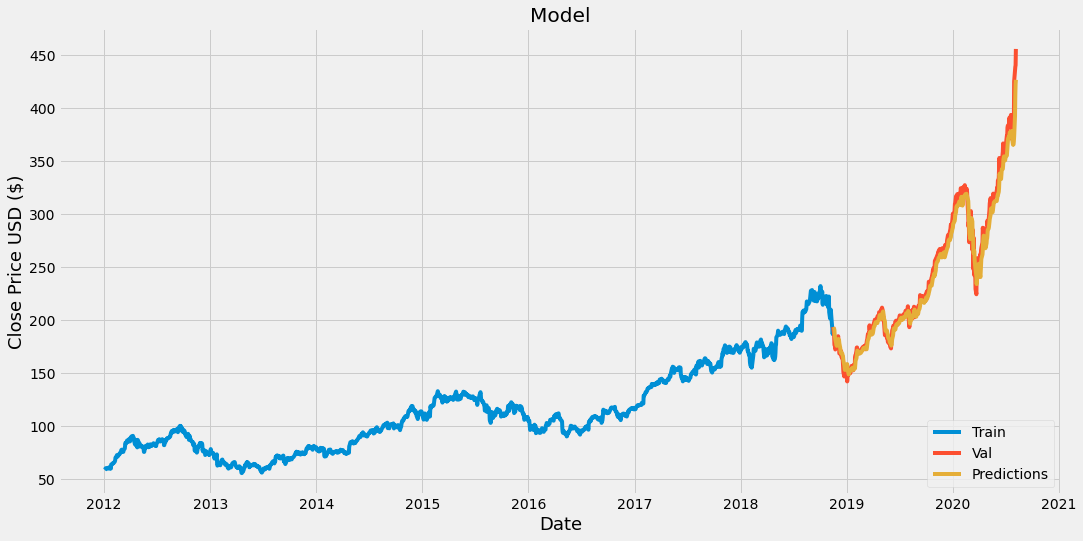

In [ ]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure (figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid


,Close,Predictions
Date,,
2018-11-16,193.529999,191.041016
2018-11-19,185.860001,191.862274
2018-11-20,176.979996,190.429901
2018-11-21,176.779999,185.825516
2018-11-23,172.289993,181.893524
...,...,...
2020-07-31,425.040009,373.025513
2020-08-03,435.750000,392.463654
2020-08-04,438.660004,411.300354


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source= 'yahoo', start = '2012-01-01', end = '2020-08-07')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[432.1547]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source= 'yahoo', start = '2019-12-18', end = '2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
